# **AP157 Image Processing Lab Assignment**
### Module B2: Fourier Transform Applications in Image Processing

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: Camit, Ma. Ezthelia Kaye\
_Student No._: 2020-06594\
_Section_:THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: MA. EZTHELIA KAYE B. CAMIT**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/20
* Part 3 - []/20
* Part 4 - []/30

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm
from numpy.fft import fft2,ifft2,fftshift,ifftshift,fft
import random
import cv2
import numpy.fft as fft
import matplotlib.image as mpimg
from PIL import Image, ImageDraw, ImageFont
from scipy import stats
from skimage import color, data, exposure
from skimage.transform import rescale

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
def aperture_fft(aperture_shape, title):
    fig, ax = plt.subplots(1, 3, figsize = (9, 4), sharey = True, tight_layout = True)
    ax[0].imshow(aperture_shape, cmap = "hot")
    ax[0].set_title("Aperture")
    ax[0].axis("off")

    
    fft_aperture = fft.fft2(aperture_shape)
    fftshift_aperture = fft.fftshift(abs(fft_aperture))
    
    img_fft = ax[1].imshow(fftshift_aperture, cmap="hot")
    ax[1].set_title("FFT")
   
    cbar1 = fig.colorbar(img_fft, ax=ax[1], shrink=0.65)  # Adjust the shrink parameter
    cbar1.ax.yaxis.set_ticks_position('right')  # Position the color bar ticks on the left side
    ax[1].axis("off")
    
    img_log_fft = ax[2].imshow(np.log(fftshift_aperture), cmap="hot")
    ax[2].set_title("FFT in log scale")
    #fig.colorbar(img_log_fft, ax=ax[2])  # Add colorbar to the third subplot
    cbar2 = fig.colorbar(img_log_fft, ax=ax[2], shrink=0.65)  # Adjust the shrink parameter
    cbar2.ax.yaxis.set_ticks_position('right')  # Position the color bar ticks on the left side
    ax[2].axis("off")
    
    img_fft0 = ax[0].imshow(aperture_shape, cmap="hot")
    cbar0 = fig.colorbar(img_fft0, ax=ax[0], shrink=0.65)  # Adjust the shrink parameter
    cbar0.ax.yaxis.set_ticks_position('right') 
    
    fig.suptitle(title)  # Add title to the entire figure


#### PART 1 - Apply 2D FFT on simple apertures *(30 points)*

1. [15 pts.] Rectangular apertures with (width, height):
- (50, 20) pixels
- (20, 50) pixels
2. [15 pts.] Circular apertures with radii:
- 5 pixels
- 10 pixels
- 20 pixels

For each aperture type, perform the following steps:

- **Step 1: Define Input Aperture**
  - Generate a 2D array representing a rectangle/circle with the specified size within a square grid of size 128 pixels (representing an optical system, for example).
  
- **Step 2: Compute Fourier Transform**
  - Use the Fast Fourier Transform (FFT) algorithm to compute the Fourier transform of the input aperture.

- **Step 3: Shift the FFT**
  - Shift the zero frequency component of the Fourier transform to the center.

- **Step 4: Visualization (Plotting)**
  - Plot the original aperture.
  - Plot the magnitude of the shifted Fourier transform.
  - Plot the log-scaled magnitude of the shifted Fourier transform.
  - Add colorbars to the plots for reference.

- **Step 5: Display**
  - Display the plots in a single figure with three subplots (original aperture, FFT magnitude, log-scaled FFT magnitude).



### Rectangular Aperture

In [3]:
def rectangular_aperture(width, height, resolution):
    aperture = np.zeros((resolution, resolution), float)
    center = [resolution/2, resolution/2]
    width_array = np.arange(center[0] - width//2, center[0] + width//2)
    height_array = np.arange(center[1] - height//2, center[1] + height//2)
    for w in width_array:
        for h in height_array:
            aperture[int(h)][int(w)] = 1.0
            
    return aperture

### horizontally oriented triangles

The activity was only recquiring to apply 2D fft on a dimensions (20,50) and (50,20) but I want to observe other outcomes for varying aperture sizes.

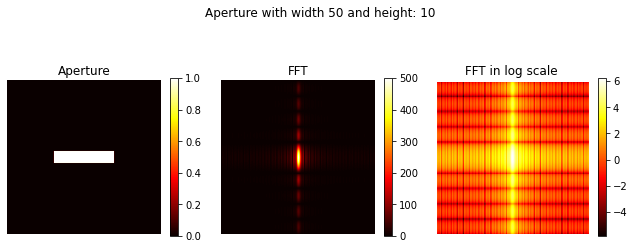

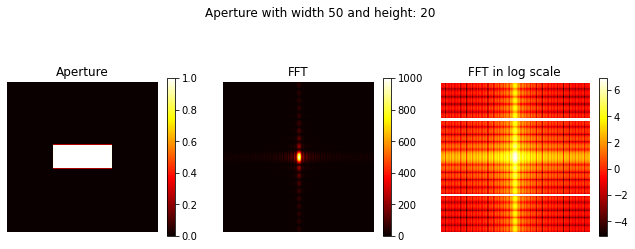

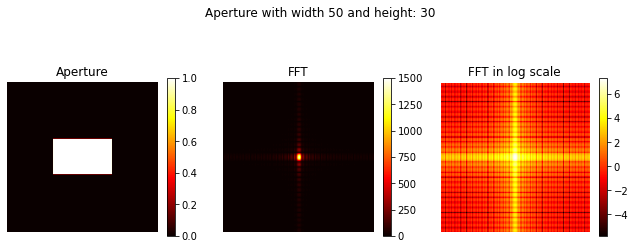

In [4]:
height = [10, 20, 30] 

for h in height:
    aperture_fft(rectangular_aperture(50, h, 128), f"Aperture with width 50 and height: {h}") 
  # Pass title for each subplot
plt.show()

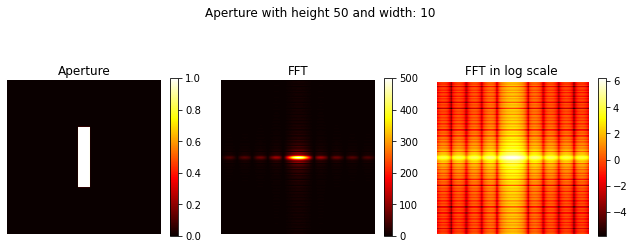

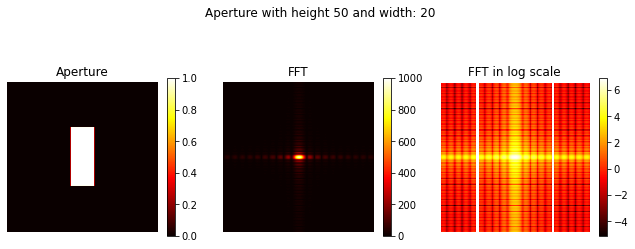

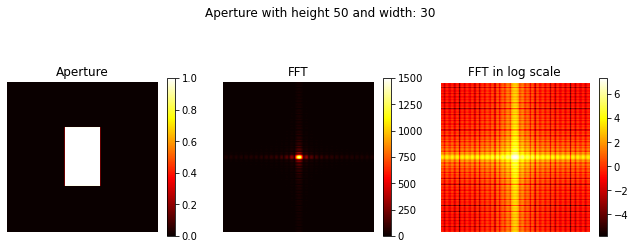

In [5]:
width = [10, 20, 30]

for w in width:
    aperture_fft(rectangular_aperture(w, 50, 128),f"Aperture with height 50 and width: {w}")
plt.show()

### Circular Aperture


In [6]:
def circular_aperture(radius, resolution):
   
    N = resolution
    x = np.linspace(-64, 64, N)
    y = x
    X, Y = np.meshgrid(x, y)
    R = np.sqrt(X**2 + Y**2)
    
    aperture = np.zeros(np.shape(R))
    aperture = np.where((R<radius), 1, 0)
    
    return aperture

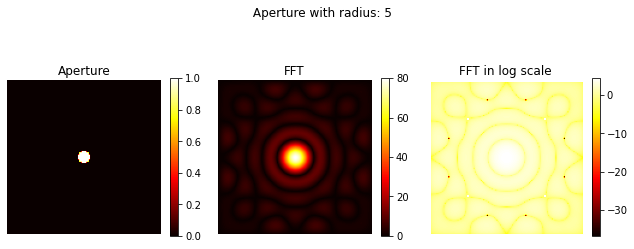

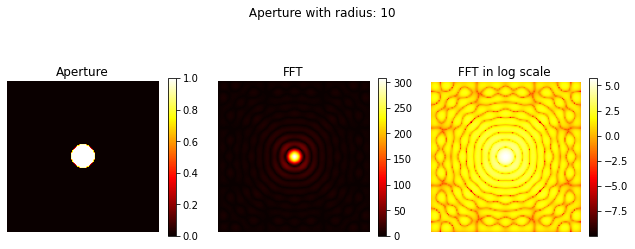

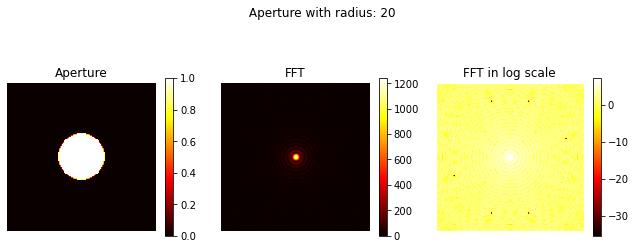

In [7]:
radius = [5,10,20]
for rad in radius:
    aperture_fft(circular_aperture(rad, 128), f" Aperture with radius: {rad}")

Varying the radii of circular apertures we can observe airy patterns. Observing the radial patterns that propagates from the center represents the peaks at the real space. 

#### PART 2 - Convolution *(20 points)*

Now that we've shown that FT acts as if an imaging system, suppose we have an image and convolve it with a circular aperture with different radii. Assuming that the circular aperture is a camera lens, we want to show how the reconstruction of the original image can be limited by the properties of the camera lens (or any imaging device) such as aperture size.

Take the astronaut image from skimage and convolve it with circular apertures of radii: 8, 32, and 64 pixels.

To do this, you can perform the ff. steps:

- **Compute Fourier Transform of Image:**
  - Use `fft2` to compute the 2D Fourier Transform of the input image.
  
- **Compute Fourier Transform of Aperture:**
  - Use `fftshift` to shift the zero-frequency component to the center.

- **Perform Element-wise Multiplication in Frequency Domain:**
  - Multiply the Fourier Transform of the image and the shifted aperture element-wise in the frequency domain.

- **Compute Inverse Fourier Transform:**
  - Use `ifft2` to compute the 2D Inverse Fourier Transform of the product from the previous step.

- **Visualization (Plotting):**
  - Create a figure with three subplots to visualize the original image, the aperture, and the convolution result.

In [41]:
from skimage import color, data, exposure
from skimage.transform import rescale

In [42]:
def convolve(img, aperture,title):
    fftshift_lens = fft.fftshift(aperture)
    fft2_text = fft.fft2(img)
    convolved_image = fftshift_lens*fft2_text
    ifft2_image = fft.ifft2(convolved_image)
    
    fig, ax = plt.subplots(1, 3, figsize = (11, 6), sharey = True, tight_layout = True)
    ax[0].imshow(img, cmap = "hot")
    ax[0].set_title("The Image")
    ax[0].axis("off")
    
    ax[1].imshow(aperture, cmap = "hot")
    ax[1].set_title("The Aperture")
    ax[1].axis("off")
    
    ax[2].imshow(abs(ifft2_image), cmap = "hot")
    ax[2].set_title("The Convolved image")
    ax[2].axis("off")
    
    fig.suptitle(title)  # Add title to the entire figure

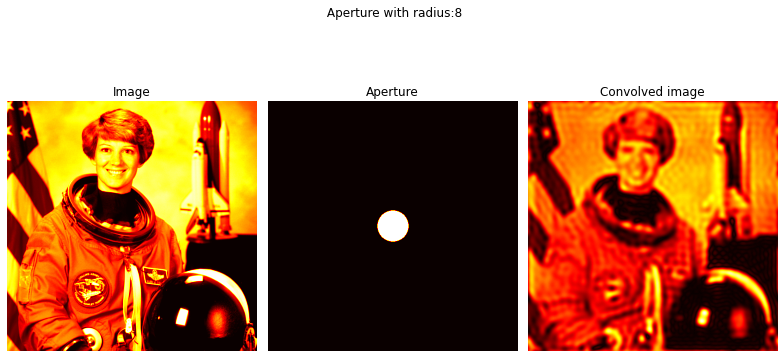

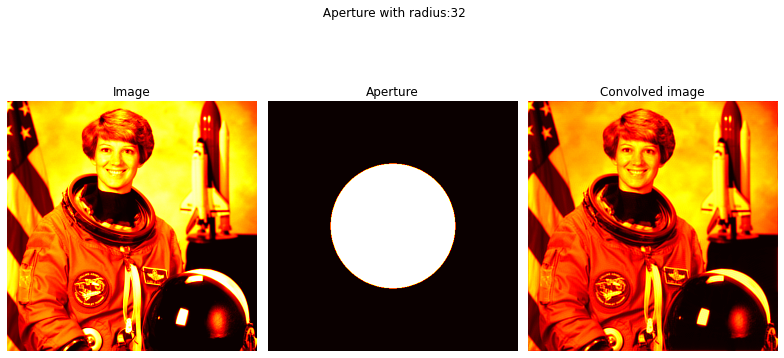

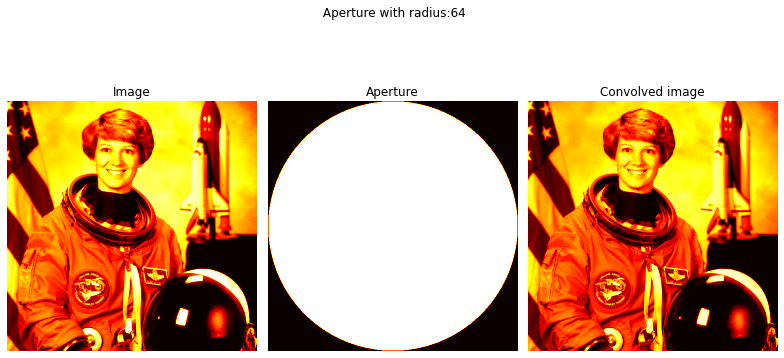

In [10]:
img = color.rgb2gray(data.astronaut())*256 

radius_convolve = [8,32,64]

for rad_convolve in radius_convolve:
    convolve(img, circular_aperture(rad_convolve, 512),f" Aperture with radius:{rad_convolve}")

As observed on the result of this part of the activity as we increase the radius of the aperture the convovled image becomes clearer, which is very much expected.

#### PART 3 - Correlation *(20 points)*

In this task, we observe using the correlation method that the similarity between two functions can be extracted-- this is also referred to as template matching.

You can get the test and target images from the "Datasets" folder in the course GDrive:
- AP157_moduleB2_correlation_test_image.png (with text "The Rain in Spain Stays Mainly in the Plain")
- AP157_moduleB2_correlation_target_image.png (with text "A")

In the correlation result, the high intensity portions indicate the presence of letter 'A' on the test image.

To get the correlation, you can perform the ff. steps:

- **Compute Fourier Transforms:**
  - Use `fft2` to compute the 2D Fourier Transform of the input test image (`image`).
  - Use `fft2` and `np.conj` to compute the complex conjugate of the 2D Fourier Transform of the target template.

- **Compute Cross-Correlation in Frequency Domain:**
  - Multiply the Fourier Transforms of the image and the complex conjugate of the Fourier Transform of the target template element-wise in the frequency domain.

- **Compute Inverse Fourier Transform:**
  - Use `ifft2` to compute the 2D Inverse Fourier Transform of the correlation.

- **Visualization (Plotting):**
  - Create a figure with three subplots to visualize the original image, the target image, and the correlation result.
  - Add colorbars to each subplot for reference and to visualize intensity levels.

In [11]:
def textimg_generate(x, y, fontsize, bgcolor = "black", textcolor = "white", resolution = 256, text = None):
    background = Image.new("L", (resolution, resolution), color = bgcolor)
    font = ImageFont.truetype("C:/Windows/Fonts/Arial/ariblk.ttf", fontsize)
    textimg = ImageDraw.Draw(background)
    textimg.text((x, y), text, font = font, fill = textcolor)
    return background


In [29]:
 def correlate(inputimg, templateimg):
    fft_correltxt = fft.fft2(inputimg)
    fft_template = fft.fft2(templateimg)
    correlated_image = (np.conjugate(fft_template))*fft_correltxt
    ifft2_image = abs(fft.ifft2(correlated_image))
    fftshift_image = fft.fftshift(ifft2_image)
    
    fig, ax = plt.subplots(1, 3, figsize = (9, 4), sharey = True, tight_layout = True)
    ax[0].imshow(inputimg, cmap = "gray")
    ax[0].set_title("Input image")
    ax[0].axis("off")
    
    ax[1].imshow(templateimg, cmap = "gray")
    ax[1].set_title("Template image")
    ax[1].axis("off")
    
    ax[2].imshow(fftshift_image, cmap = "hot")
    ax[2].set_title("Correlation map")
    ax[2].axis("off")

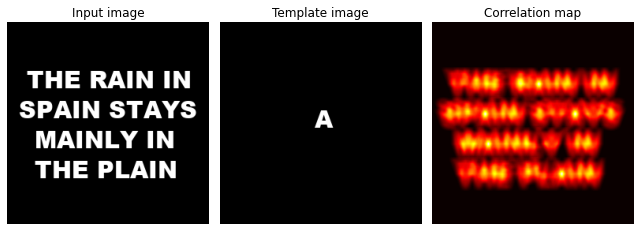

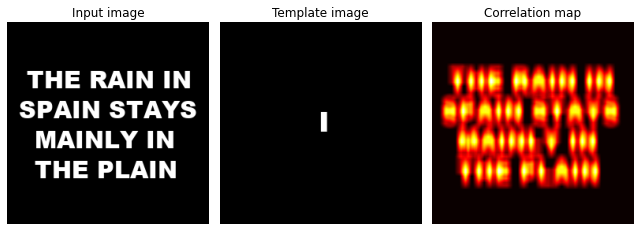

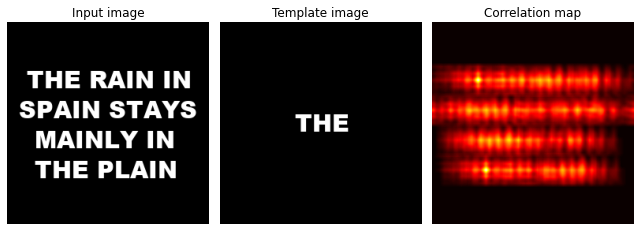

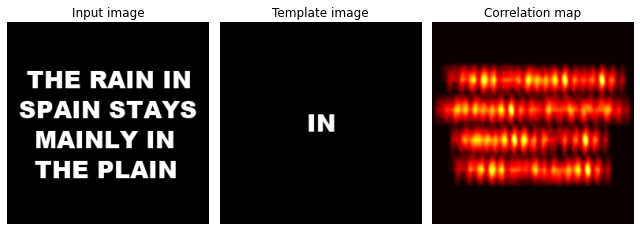

In [30]:

correlation_text = textimg_generate(15, 50, 30, text = " THE RAIN IN\nSPAIN STAYS \n  MAINLY IN \n  THE PLAIN")
letter_A = textimg_generate(120, 100, 30, text = "A")
letter_I = textimg_generate(125, 100, 35, text = "I")
THE_text = textimg_generate(95, 105, 30, text = "THE")
IN_text = textimg_generate(110, 105, 30, text = "IN")

correlate(correlation_text, letter_A)
correlate(correlation_text, letter_I)
correlate(correlation_text, THE_text)
correlate(correlation_text, IN_text)

The correlatoin between two dimensional function gives the degree of similarity between two functions. Meaning, the more identical they are at a certain position then the higher the correlation value would be. Correlation is often used in template matching. In this part of the acitvity we created a phrase and letters also certain phrases where used as templates. As observed on the correlation map the yellow part indicates the presence of such text in the original image, meaning there is a correlation. So the more yellow the area it means the more correlated it is. One limitation i observed in this is that for letter I the correlation peaks everywhere this is due to the fact that the algorithm matches the template image and phrase pixel by pixel. Since letter I is a vertical line it ticks off all vertical lines in the phrase.

#### PART 4 - Application: Canvas Weave Modeling and Removal *(30 points)*

Suppose we want to investigate the brush strokes of a painter. However, the texture of the canvas obscures our view of the brushstrokes. Let’s use FFT to remove the canvas weave.

Perform the ff. steps:

1. Open the image AP157_moduleB_canvas_weave_image.jpg (also in the Datasets folder; the image is from a painting by Dr. Vincent Daria.) and convert into a grayscale image. To enhance the detection of repeating patterns we first subtract the mean grayscale from the image. This will remove the DC bias of intensity images.

2. Take the FT of the mean-subtracted image and take note of the symmetric peaks. These are the sinusoids that make up the canvas weave image, similar to the rotation property of sinusoids we did earlier.

3. Manually create a filter mask in the FT space to remove the canvas weave patterns. This is a matrix which is the same size as the image. The filter is all 1’s but are zero at the locations of the sinusoidal peaks. FFT shift this filter and multiply this to the complex FT of the Red, Green and Blue channels of the original image (not mean subtracted). The filter essentially “erases” the peaks. Take the inverse FT of the filtered FT and overlay the filtered R,G,B images. Did the canvas weave vanish enough that the paint and brushstrokes remain?

4. Invert the filter mask (0's become 1's and vice versa) and take the inverse Fourier transform. Observe the generated modulus image. Is it close to the appearance of the canvas weave?

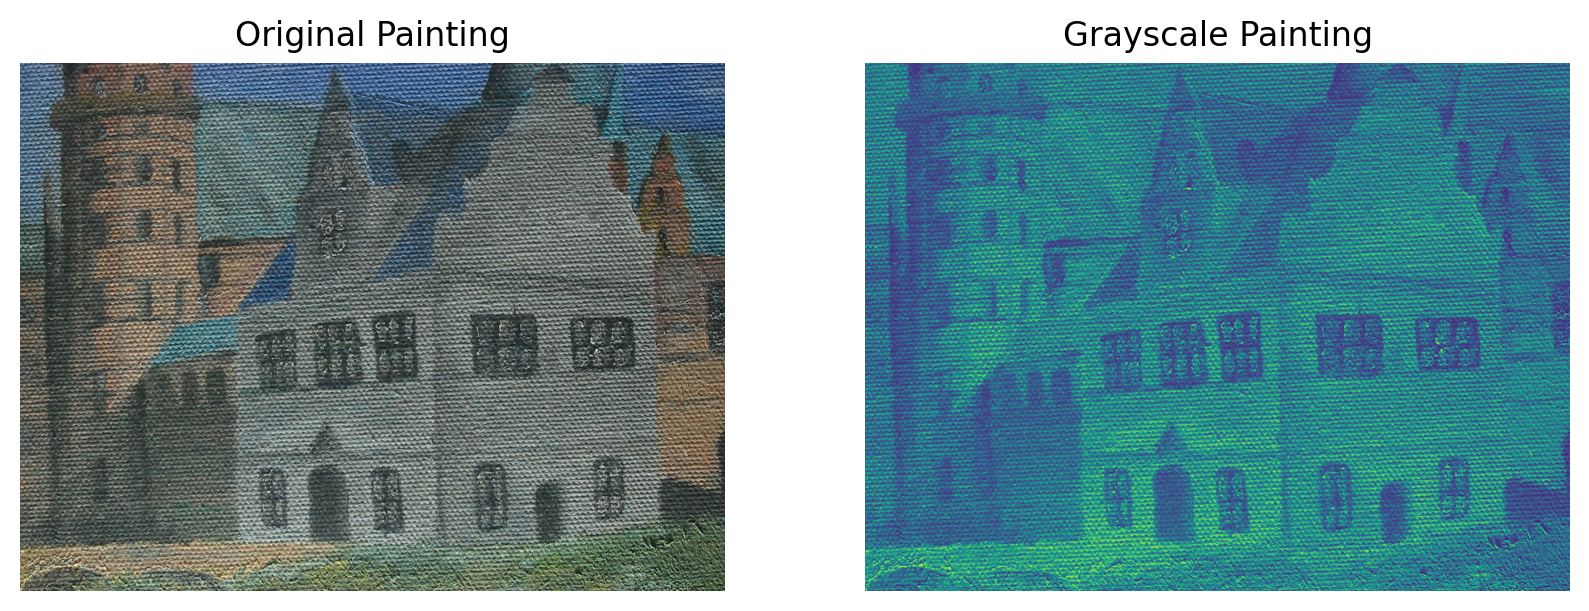

In [32]:
painting = Image.open("Canvas_painting.jpg")
plt.figure(figsize=(10,5), dpi = 200)
plt.subplot(121)
plt.title("Original Painting")
plt.imshow(painting, vmax = 255)
plt.axis('off')

## now we have to turn this image into grayscale
grayscale_painting = np.array(painting.convert("L"))
plt.subplot(122)
plt.title("Grayscale Painting")
plt.imshow(grayscale_painting)
plt.axis('off')  # Turn off axis
plt.show()  # I want to show just to make sure that i got the right image

In this part of the activity we had to convert the painting into grayscale in order to remove the DC bias of the image. 

In [33]:
mean_grayscale = grayscale_painting - np.mean(grayscale_painting)

unfiltered_FFT = np.log(abs(fft.fftshift(fft.fft2(mean_grayscale)))) 

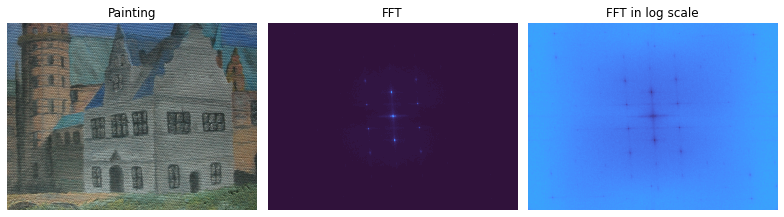

In [34]:
fig, ax = plt.subplots(1, 3, figsize = (11, 6), tight_layout = True)
ax[0].imshow(painting, cmap = "gray")
ax[0].set_title("Painting")
ax[1].imshow(abs(fft.fftshift(fft.fft2(mean_grayscale))), cmap = "turbo")
ax[1].set_title("FFT")
ax[2].imshow(np.log(abs(fft.fftshift(fft.fft2(mean_grayscale)))), cmap = "turbo_r")
ax[2].set_title("FFT in log scale")

for a in ax:
    a.axis("off")

We can manually create a filter mask in the FT space to remove the canvas weave patterns. This is a matrix which is the same size as the image. The filter is all ones but are zeros at the locations of the sinusoidal peaks.

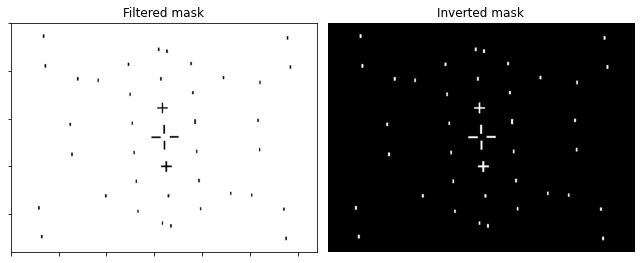

In [35]:
filtered_mask = Image.open("filtered mask.png")
filtered_mask = np.array(filtered_mask.convert("L"))

inverted_mask = Image.open("inverted mask.png")
inverted_mask = np.array(inverted_mask.convert("L"))

fig, ax = plt.subplots(1, 2, figsize = (9, 4), tight_layout = True, sharey = True)
ax[0].imshow(filtered_mask, cmap = "gray")
ax[0].set_title("Filtered mask")
ax[1].imshow(inverted_mask, cmap = "gray")
ax[1].set_title("Inverted mask")
ax[1].axis("off")

ax[0].xaxis.set_tick_params(labelbottom = False)
ax[0].yaxis.set_tick_params(labelleft = False)


We take the FFT shift of the filter and multiply this to the complex Fourier transform of the red, green and blue channels of the original image. The filter essentially erases the peaks.

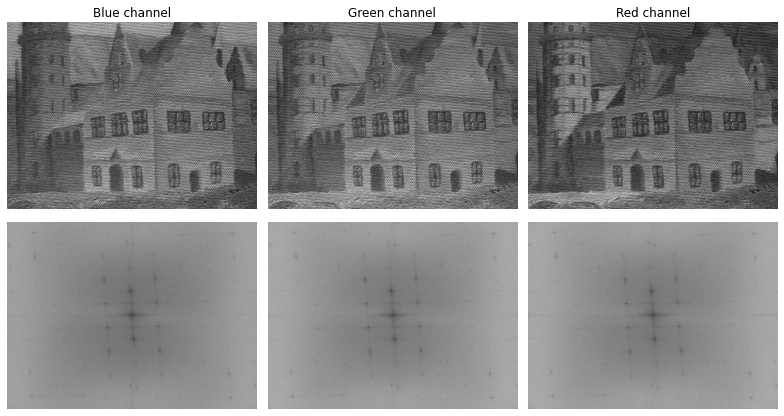

In [43]:
orig_painting = np.array(Image.open("Canvas_Painting.jpg"))
img = orig_painting

Rd, Gn, Bl = img[:,:,0], img[:,:,1], img[:,:,2]
channels = [Bl, Gn, Rd]
titles = ["Blue channel", "Green channel", "Red channel"]

fig, ax = plt.subplots(2, 3, figsize = (11, 6), tight_layout = True)
for i in range(len(channels)):
    ax[0,i].imshow(channels[i], cmap = "gray")
    ax[0,i].set_title(titles[i])
    ax[0,i].axis("off")
    ax[1,i].imshow(np.log(abs(fft.fftshift(fft.fft2(channels[i])))), cmap = "gray_r")
    ax[1,i].axis("off")


As observed in this there are little no difference on the peaks in the RGB channels

In [37]:
def canvas_deweave(img, mask_img): # img and mask_img must be in array type
    fftshift_mask = fft.fftshift(mask_img)
    fftRd = fftshift_mask * fft.fft2(img[:,:,0])
    fftGn = fftshift_mask * fft.fft2(img[:,:,1])
    fftBl = fftshift_mask * fft.fft2(img[:,:,2])
    ifftRd = fft.ifft2(fftRd)
    ifftGn = fft.ifft2(fftGn)
    ifftBl = fft.ifft2(fftBl)

    filtered_img = abs(np.dstack((ifftRd, ifftGn, ifftBl)))
    filtered_img = filtered_img / filtered_img.max()
    filtered_img *= 255
    filtered_img = filtered_img.astype(np.uint8)
    
    return filtered_img

In [38]:
def white_balance(img): # img must be in array type
    Rd, Gn, Bl = img[:,:,0], img[:,:,1], img[:,:,2]
    Rdave, Gnave, Blave = np.average(Rd), np.average(Gn), np.average(Bl)
    RdWB, GnWB, BlWB = Rd/Rdave, Gn/Gnave, Bl/Blave
    
    RGB_GWArestored = np.dstack((RdWB, GnWB, BlWB))
    RGB_GWArestored = RGB_GWArestored/RGB_GWArestored.max()
    RGB_GWArestored *= 255
    RGB_GWArestored = RGB_GWArestored.astype(np.uint8)
    
    return RGB_GWArestored

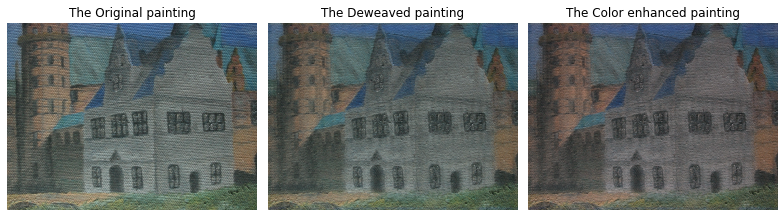

In [39]:
fig, ax = plt.subplots(1, 3, figsize = (11, 6), tight_layout = True)
ax[0].imshow(orig_painting, cmap = "gray")
ax[0].set_title("The Original painting")
ax[1].imshow(canvas_deweave(orig_painting, filtered_mask))
ax[1].set_title("The Deweaved painting")
ax[2].imshow(white_balance(canvas_deweave(orig_painting, filtered_mask)))
ax[2].set_title("The Color enhanced painting")

for a in ax:
    a.axis("off")
    